In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving college.csv to college.csv


In [2]:
df=pd.read_csv('college.csv')
df.shape#seeing number of rows and columns

(7094, 11)

In [3]:
df.head()

,Section,Course Code,Course Name,Semester,Lateral Student,Department Code,CGPA,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,A,902,Biomedical,III,No,BME,5.50,NaN,NaN,NaN,NaN
1,A,902,Biomedical,III,No,BME,8.17,NaN,NaN,NaN,NaN
2,A,902,Biomedical,III,No,BME,7.74,NaN,NaN,NaN,NaN
3,A,902,Biomedical,III,No,BME,8.17,NaN,NaN,NaN,NaN
4,A,902,Biomedical,III,No,BME,6.90,NaN,NaN,NaN,NaN


In [4]:
df=df.drop(columns=['Unnamed: 7',	'Unnamed: 8',	'Unnamed: 9',	'Unnamed: 10'])#dropping unrequired columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Section          7094 non-null   object 
 1   Course Code      7094 non-null   int64  
 2   Course Name      7094 non-null   object 
 3   Semester         7094 non-null   object 
 4   Lateral Student  7094 non-null   object 
 5   Department Code  7094 non-null   object 
 6   CGPA             7094 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 388.1+ KB


In [6]:
df.isnull().sum()#showing names of all columns along with if they have null values or not

,0
Section,0
Course Code,0
Course Name,0
Semester,0
Lateral Student,0
Department Code,0
CGPA,0


In [7]:
#showing rows 15 to 20(not inclusive)
df.iloc[15:20]

,Section,Course Code,Course Name,Semester,Lateral Student,Department Code,CGPA
15,A,902,Biomedical,III,No,BME,8.45
16,A,902,Biomedical,III,No,BME,6.12
17,A,902,Biomedical,III,No,BME,6.24
18,A,902,Biomedical,III,No,BME,6.38
19,A,902,Biomedical,III,No,BME,7.40


In [8]:
#to filter the students getting 8.4+ CGPA
filt=(df['CGPA']>8.4)
df[filt]

,Section,Course Code,Course Name,Semester,Lateral Student,Department Code,CGPA
15,A,902,Biomedical,III,No,BME,8.45
30,A,902,Biomedical,III,No,BME,8.76
31,A,902,Biomedical,III,No,BME,9.19
54,A,902,Biomedical,V,No,BME,8.45
63,A,902,Biomedical,V,No,BME,8.49
...,...,...,...,...,...,...,...
7079,B,968,DSE,VII,No,DSE,9.21
7083,B,968,DSE,VII,No,DSE,9.40
7084,B,968,DSE,VII,No,DSE,8.52
7087,B,968,DSE,VII,No,DSE,8.50


In [9]:
#checking how many students are lateral entry
df['Lateral Student'].value_counts()

,count
Lateral Student,
No,6952
Yes,142


In [10]:
df.groupby(['Course Name']).get_group('ECE')#Extracting ECE Course

/tmp/ipython-input-10-2499625370.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df.groupby(['Course Name']).get_group('ECE')#Extracting ECE Course


,Section,Course Code,Course Name,Semester,Lateral Student,Department Code,CGPA
2126,A,907,ECE,III,No,ECE,7.62
2127,A,907,ECE,III,No,ECE,6.10
2128,A,907,ECE,III,No,ECE,8.33
2129,A,907,ECE,III,No,ECE,9.74
2130,A,907,ECE,III,No,ECE,7.48
...,...,...,...,...,...,...,...
2778,C,907,ECE,VII,No,ECE,7.48
2779,C,907,ECE,VII,No,ECE,7.23
2780,C,907,ECE,VII,No,ECE,6.93
2781,C,907,ECE,VII,No,ECE,8.93


In [11]:
df['Course Name'].unique()#how many unique Courses are there in the college

array(['Biomedical', 'Chemical', 'Civil', 'CSE', 'AIML', 'EEE', 'ECE',
       'VLSI', 'Industrial and Production', 'Mechanical',
       'Mechanical (Deakin)', 'Industrial', 'IT', 'CCE', 'Biotechnology',
       'Mechatronics', 'MechX (Deakin)', 'ENI', 'CPS', 'Aeronautical',
       'Automobile', 'MnC', 'Fintech', 'DSE'], dtype=object)

In [12]:
def assign(cgpa):
    if cgpa >= 9:
        return 'A+'
    elif cgpa >= 8:
        return 'A'
    elif cgpa >= 7:
        return 'B'
    elif cgpa >= 6:
        return 'C'
    elif cgpa >= 5:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['CGPA'].apply(assign)

In [13]:
up_limit=df.CGPA.mean()+3*df.CGPA.std()
low_limit=df.CGPA.mean()-3*df.CGPA.std()

In [14]:
#outlier DETECTION of CGPA
new_df=df[(df.CGPA>up_limit) | (df.CGPA<low_limit)]

In [15]:
new_df.value_counts()#categorizing and counting

Section  Course Code  Course Name   Semester  Lateral Student  Department Code  CGPA  Grade
A        934          Automobile    III       Yes              AAE              0.0   F        7
         904          Civil         III       Yes              CIE              0.0   F        4
         903          Chemical      III       Yes              CHE              0.0   F        3
         905          CSE           III       Yes              CSE              0.0   F        3
B        905          CSE           III       Yes              CSE              0.0   F        3
C        909          Mechanical    III       Yes              MME              0.0   F        3
A        933          Aeronautical  III       Yes              AAE              0.0   F        2
         958          Fintech       III       Yes              HUM              0.0   F        2
B        907          ECE           III       Yes              ECE              0.0   F        2
A        929          Mechatronics  III       Yes              MTE              0.0   F        2
C        905          CSE           III       Yes              CSE              0.0   F        2
         907          ECE           III       Yes              ECE              0.0   F        2
D        905          CSE           III       Yes              CSE              0.0   F        2
A        911          IT            III       Yes              ICT              0.0   F        1
         932          ENI           III       Yes              ICE              0.0   F        1
         931          Industrial    III       Yes              MIE              0.0   F        1
         907          ECE           III       Yes              ECE              0.0   F        1
         906          EEE           III       Yes              ELE              0.0   F        1
B        906          EEE           III       Yes              ELE              0.0   F        1
A        968          DSE           III       Yes              DSE              0.0   F        1
         959          VLSI          III       Yes              ECE              0.0   F        1
         953          CCE           III       Yes              ICT              0.0   F        1
         909          Mechanical    III       Yes              MME              0.0   F        1
B        911          IT            III       Yes              ICT              0.0   F        1
         961          CPS           III       Yes              ICE              0.0   F        1
         909          Mechanical    III       Yes              MME              0.0   F        1
C        906          EEE           III       Yes              ELE              0.0   F        1
B        968          DSE           III       Yes              DSE              0.0   F        1
C        962          AIML          III       Yes              CSE              0.0   F        1
         911          IT            III       Yes              ICT              0.0   F        1
         968          DSE           III       Yes              DSE              0.0   F        1
D        907          ECE           III       Yes              ECE              0.0   F        1
         911          IT            III       Yes              ICT              0.0   F        1
         953          CCE           III       Yes              ICT              0.0   F        1
Name: count, dtype: int64

In [16]:
df['z_score']=(df.CGPA-df.CGPA.mean())/df.CGPA.std()
df#using Z score to tell how many std deviations we are away from the mean

,Section,Course Code,Course Name,Semester,Lateral Student,Department Code,CGPA,Grade,z_score
0,A,902,Biomedical,III,No,BME,5.50,D,-1.217015
1,A,902,Biomedical,III,No,BME,8.17,A,0.711044
2,A,902,Biomedical,III,No,BME,7.74,B,0.400533
3,A,902,Biomedical,III,No,BME,8.17,A,0.711044
4,A,902,Biomedical,III,No,BME,6.90,C,-0.206047
...,...,...,...,...,...,...,...,...,...
7089,B,968,DSE,VII,No,DSE,7.31,B,0.090022
7090,B,968,DSE,VII,No,DSE,7.17,B,-0.011075
7091,B,968,DSE,VII,No,DSE,7.31,B,0.090022
7092,B,968,DSE,VII,No,DSE,8.56,A,0.992671


In [17]:
df[(df['z_score']>3) | (df['z_score']<-3)]
#top outliers

,Section,Course Code,Course Name,Semester,Lateral Student,Department Code,CGPA,Grade,z_score
198,A,903,Chemical,III,Yes,CHE,0.0,F,-5.188672
199,A,903,Chemical,III,Yes,CHE,0.0,F,-5.188672
200,A,903,Chemical,III,Yes,CHE,0.0,F,-5.188672
331,A,904,Civil,III,Yes,CIE,0.0,F,-5.188672
332,A,904,Civil,III,Yes,CIE,0.0,F,-5.188672
333,A,904,Civil,III,Yes,CIE,0.0,F,-5.188672
334,A,904,Civil,III,Yes,CIE,0.0,F,-5.188672
491,A,905,CSE,III,Yes,CSE,0.0,F,-5.188672
492,A,905,CSE,III,Yes,CSE,0.0,F,-5.188672
493,A,905,CSE,III,Yes,CSE,0.0,F,-5.188672


In [18]:
df.groupby('Course Name')['CGPA'].mean().sort_values(ascending=False)
#average cgpa by course

,CGPA
Course Name,
AIML,7.661842
CSE,7.548732
MnC,7.499859
ECE,7.444871
Biotechnology,7.432100
IT,7.429956
CCE,7.429078
DSE,7.387028
Fintech,7.288121


In [19]:
df.groupby('Lateral Student')['CGPA'].mean()
#mean cgpa of lateral vs non lateral student

,CGPA
Lateral Student,
No,7.257323
Yes,3.661056


<Axes: xlabel='CGPA', ylabel='Count'>

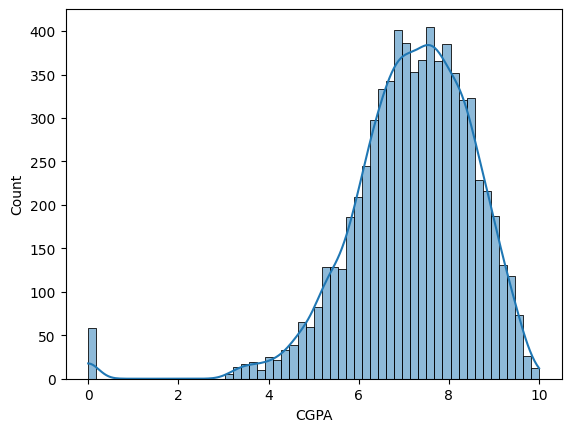

In [20]:
import seaborn as sns
sns.histplot(df['CGPA'], kde=True)

In [25]:
#Highest CGPA in each branch
df.groupby('Course Name')['CGPA'].max()

,CGPA
Course Name,
AIML,9.78
Aeronautical,9.90
Automobile,9.40
Biomedical,9.71
Biotechnology,9.83
CCE,9.76
CPS,9.42
CSE,9.98
Chemical,9.50
